Reference: https://github.com/enakai00/jupyter_tfbook

In [22]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20180802)
tf.set_random_seed(20180802)

In [23]:
mnist = input_data.read_data_sets('./data/', one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [24]:
num_units = 1024

x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w0 = tf.Variable(tf.zeros([num_units, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)

In [25]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [27]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print('Step: {}, Loss: {}, Accuracy: {}'.format(i, loss_val, acc_val))

Step: 100, Loss: 2693.5712890625, Accuracy: 0.9196000099182129
Step: 200, Loss: 2034.9425048828125, Accuracy: 0.9383999705314636
Step: 300, Loss: 1724.7080078125, Accuracy: 0.9458000063896179
Step: 400, Loss: 1449.998291015625, Accuracy: 0.9552000164985657
Step: 500, Loss: 1393.534423828125, Accuracy: 0.9564999938011169
Step: 600, Loss: 1297.354736328125, Accuracy: 0.9593999981880188
Step: 700, Loss: 1250.828125, Accuracy: 0.9607999920845032
Step: 800, Loss: 1411.64013671875, Accuracy: 0.9563999772071838
Step: 900, Loss: 1127.702880859375, Accuracy: 0.9648000001907349
Step: 1000, Loss: 1193.92236328125, Accuracy: 0.9603000283241272
Step: 1100, Loss: 1109.050048828125, Accuracy: 0.9666000008583069
Step: 1200, Loss: 1101.580322265625, Accuracy: 0.9667999744415283
Step: 1300, Loss: 1005.168212890625, Accuracy: 0.9696000218391418
Step: 1400, Loss: 1049.7677001953125, Accuracy: 0.9681000113487244
Step: 1500, Loss: 1075.467041015625, Accuracy: 0.9635999798774719
Step: 1600, Loss: 960.5683593

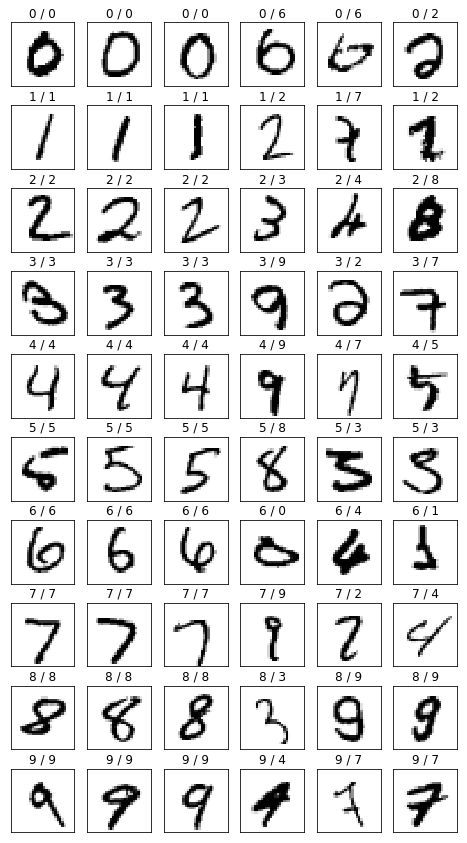

In [28]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('{} / {}'.format(prediction ,actual))
            subplot.imshow(image.reshape(28,28), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break